In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import kagglehub

In [49]:
data=pd.read_csv("/content/retail_logistic.csv")
data.head()

,Purchasing behaviour,Gender,Age,Time spent in online shop,Purchasing_flag
0,Buy now,female,22,40,1
1,Buy now,female,25,23,1
2,Buy now,male,18,12,1
3,Buy now,male,45,28,1
4,Buy now,female,12,43,1


In [52]:
data_encoded['Purchasing_flag'] = data['Purchasing behaviour'].apply(lambda x: 1 if x == 'Buy now' else 0)
data_encoded=data_encoded[['Age','Time spent in online shop','Gender_male','Purchasing_flag']]
data_encoded=pd.get_dummies(data_encoded, drop_first=True)


data_encoded.head(5)

,Age,Time spent in online shop,Gender_male,Purchasing_flag
0,22,40,False,1
1,25,23,False,1
2,18,12,True,1
3,45,28,True,1
4,12,43,False,1


In [53]:
data_encoded.dtypes

,0
Age,int64
Time spent in online shop,int64
Gender_male,bool
Purchasing_flag,int64


In [54]:
data_encoded.isnull().sum()

,0
Age,0
Time spent in online shop,0
Gender_male,0
Purchasing_flag,0


In [55]:
x=data_encoded[['Gender_male','Age','Time spent in online shop']]
y=data_encoded['Purchasing_flag']

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=38)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(19, 3)

(19,)

(5, 3)

(5,)

In [57]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [58]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[2 1]
 [1 1]]
Accuracy Score :  0.6
Accuracy in Percentage :  60 %


<Axes: >

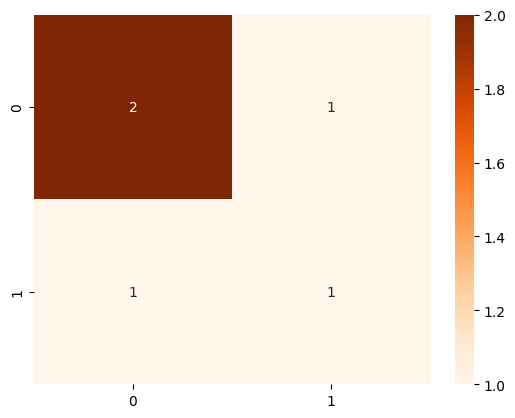

In [62]:
sn.heatmap(conf_mat, annot=True, cmap='Oranges')